Import Common Libraries

In [15]:
import numpy as np
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import pickle

In [16]:
train_path = 'C:/Users/Owner/Desktop/Produce Item Recognition/DataSet/TrainSet/'
valid_path = 'C:/Users/Owner/Desktop/Produce Item Recognition/DataSet/ValidationSet/'
test_path = 'C:/Users/Owner/Desktop/Produce Item Recognition/DataSet/TestSet/'


train_image_files = glob(train_path + '/*/*.jp*g')
valid_image_files = glob(valid_path + '/*/*.jp*g')

In [17]:
import os
entries = os.listdir(train_path)
folders = glob(train_path + '/*')
train_class_dist={}
count=0
for folder in folders:
  number_of_images=glob(folder+'/*.jp*g')
  train_class_dist[entries[count]]=len(number_of_images)
  count+=1

valid_entries = os.listdir(valid_path)
valid_folders = glob(valid_path + '/*')
valid_class_dist={}
count=0
for folder in valid_folders:
  valid_number_of_images=glob(folder+'/*.jp*g')
  valid_class_dist[entries[count]]=len(valid_number_of_images)
  count+=1

Import Inception

In [18]:
import plotly.express as px

fig = px.bar(train_class_dist.keys(), x=list(train_class_dist.keys()), y=list(train_class_dist.values()),labels={"y":"Class Size", "x":"Fruits and Vegetables"},title="Train DataSet")
fig.update_traces(texttemplate='%{y:.2s}', textposition='outside')

fig.show()

Load Dataset

In [19]:
import plotly.express as px

fig = px.bar(valid_class_dist.keys(), x=list(valid_class_dist.keys()), y=list(valid_class_dist.values()),labels={"y":"Class Size", "x":"Fruits and Vegetables"},title="Validation DataSet")
fig.update_traces(texttemplate='%{y:.2s}', textposition='outside')

fig.show()

Capture all files

In [20]:
IMAGE_SIZE = [100, 100]
epochs = 100
train_batch_size =16
valid_batch_size=8
test_batch_size=8

In [21]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import keras
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import optimizers

In [22]:
gen = ImageDataGenerator(
    rescale=1./255,
    #featurewise_center=True,
    #featurewise_std_normalization=True,
    rotation_range=10,
    shear_range=0.2,
    zoom_range=0.2,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    
)

test_gen = gen.flow_from_directory(valid_path, target_size=IMAGE_SIZE)
print(test_gen.class_indices)
labels = [None] * len(test_gen.class_indices)
for k, v in test_gen.class_indices.items():
  labels[v] = k




Found 7680 images belonging to 24 classes.
{'Apple': 0, 'Avocado': 1, 'Banana': 2, 'Blueberry': 3, 'Brocolli': 4, 'Cabbage': 5, 'Canada Pear': 6, 'Carrot': 7, 'Garlic': 8, 'Green Peas': 9, 'Green Pepper': 10, 'Lettuce': 11, 'Mangoes': 12, 'Okra': 13, 'Orange': 14, 'Pineapple': 15, 'Red Chilli': 16, 'Red Onions': 17, 'Spinach': 18, 'Spring Onion': 19, 'Tomato': 20, 'Yellow Onion': 21, 'Yellow Potato': 22, 'bell pepper': 23}


Found 19181 images belonging to 24 classes.


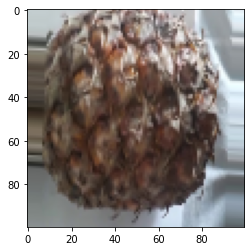

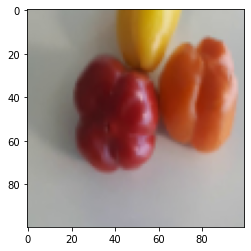

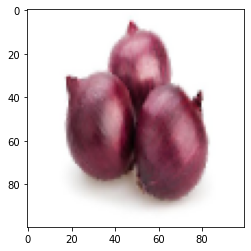

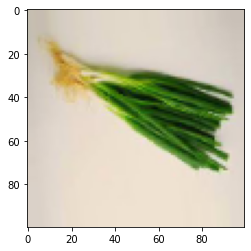

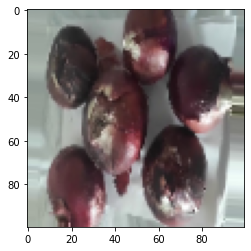

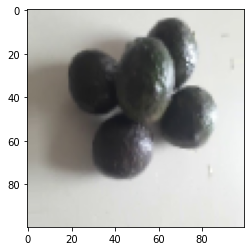

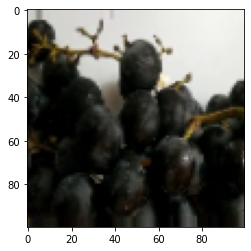

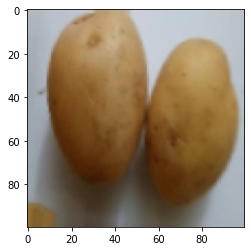

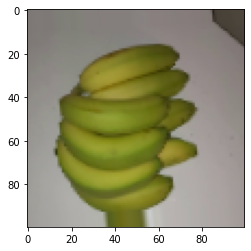

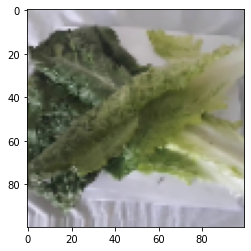

In [23]:
tgr = gen.flow_from_directory(
    train_path,
    color_mode = "rgb",
    target_size=(100,100),
    batch_size=1,
    class_mode=None)


i = 0
img_list = []
for batch in tgr:
    img_list.append(batch)
    i += 1
    if i > 9:
        break
        

for img in img_list:
    plt.imshow(np.squeeze(img))
    plt.show()


In [24]:
train_generator = gen.flow_from_directory(
  train_path,
  color_mode = "rgb",
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=train_batch_size,
  seed=42,
    
)
valid_generator = gen.flow_from_directory(
  valid_path,
  color_mode = "rgb",
  target_size=IMAGE_SIZE,
  shuffle=False,
  batch_size=valid_batch_size,
  
)
test_generator = gen.flow_from_directory(
  test_path,
  color_mode = "rgb",
  target_size=IMAGE_SIZE,
  shuffle=False,
  
)


Found 19181 images belonging to 24 classes.
Found 7680 images belonging to 24 classes.
Found 7680 images belonging to 24 classes.


In [25]:
#Simple CNN from scratch - we are using 3 Conv layers followed by maxpooling layers.
# At the end we add dropout, flatten and some fully connected layers(Dense).

from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(100,100,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(24,activation = 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 100, 100, 16)      208       
_________________________________________________________________
activation_3 (Activation)    (None, 100, 100, 16)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 50, 50, 32)        2080      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 25, 25, 64)        8256      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 64)       

Labels

In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


Training Configuration

In [27]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("C:/Users/Owner/Desktop/Produce Item Recognition/cnn.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=2, verbose=1, mode='auto')

r=model.fit_generator(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs,
  callbacks=[early,checkpoint],
  steps_per_epoch=len(train_image_files) // train_batch_size,
  validation_steps=len(valid_image_files) //valid_batch_size,
 
  
)


Epoch 1/100
1198/1198 [==============================] - 642s 536ms/step - loss: 1.4392 - accuracy: 0.5380 - val_loss: 0.1025 - val_accuracy: 0.8784

Epoch 00001: val_accuracy improved from -inf to 0.87839, saving model to C:/Users/Owner/Desktop/Produce Item Recognition/cnn.h5
Epoch 2/100
1198/1198 [==============================] - 592s 494ms/step - loss: 0.4633 - accuracy: 0.8559 - val_loss: 0.0061 - val_accuracy: 0.9672

Epoch 00002: val_accuracy improved from 0.87839 to 0.96719, saving model to C:/Users/Owner/Desktop/Produce Item Recognition/cnn.h5
Epoch 3/100
1198/1198 [==============================] - 597s 498ms/step - loss: 0.2941 - accuracy: 0.9133 - val_loss: 0.0121 - val_accuracy: 0.9594

Epoch 00003: val_accuracy did not improve from 0.96719
Epoch 4/100
1198/1198 [==============================] - 596s 498ms/step - loss: 0.2282 - accuracy: 0.9339 - val_loss: 3.2547e-04 - val_accuracy: 0.9707

Epoch 00004: val_accuracy improved from 0.96719 to 0.97070, saving model to C:/Use

Reshaping Image

In [29]:
model.save("cnn_10.h5")

Display Reshaped Image

Plot the train and validation loss

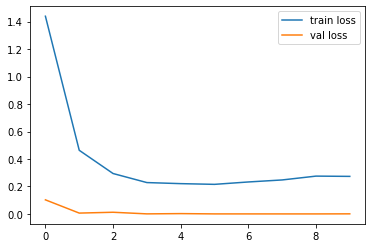

In [30]:

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

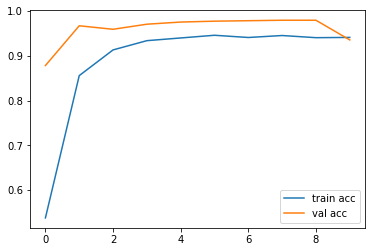

In [31]:

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

Print train and test accuracy

In [32]:
print("Final training accuracy = {}".format(r.history["accuracy"][-1]))
print("Final validation accuracy = {}".format(r.history["val_accuracy"][-1]))


Final training accuracy = 0.9411948919296265
Final validation accuracy = 0.935546875


Load Model

In [33]:
model = load_model('cnn_10.h5')

In [35]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


Prediction HERE- load image

In [36]:
IMAGE_SIZE=[100,100]
def load_image(image_path):
    img = image.load_img(image_path, target_size=IMAGE_SIZE)
    return img

Call image to be predicted

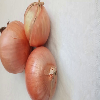

In [37]:
image_path="C:/Users/Owner/Desktop/Produce Item Recognition/DataSet/TestSet/Yellow Onion/image1.jpg"
img=load_image(image_path)
img


Get images array for prediction

In [40]:
 def getImages(img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    return images


In [41]:
images=getImages(img)

Predict function

In [42]:
predict_result={}
def predict_image(images):
    classes = model.predict(images)
    a=classes.tolist()
    for i in a[0]:
      if i>0.002:
        pos=a[0].index(i)
        val=i
        for label in test_gen_class_indices.keys():
          if test_gen_class_indices[label]==pos:
            predict_result[label]=val
    return predict_result
    

Call predict function

In [43]:

test_gen_class_indices={'Apple': 0, 'Avocado': 1, 'Banana': 2, 'Blueberry': 3, 'Brocolli': 4, 'Cabbage': 5, 'Canada Pear': 6, 'Carrot': 7, 'Garlic': 8, 'Green Peas': 9, 'Green Pepper': 10, 'Lettuce': 11, 'Mangoes': 12, 'Okra': 13, 'Orange': 14, 'Pineapple': 15, 'Red Chilli': 16, 'Red Onions': 17, 'Spinach': 18, 'Spring Onion': 19, 'Tomato': 20, 'Yellow Onion': 21, 'Yellow Potato': 22, 'bell pepper': 23}
prediction=predict_image(images)
for key in prediction.keys():
    print('%s (%.2f%%)' % (key, prediction[key]*100))

Yellow Onion (100.00%)


In [44]:
predictions = model.predict_generator(test_generator)


In [46]:

import numpy
import sklearn.metrics as metrics

predicted_classes = numpy.argmax(predictions, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys()) 

report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)

print(report)

               precision    recall  f1-score   support

        Apple       0.88      0.84      0.86       320
      Avocado       0.99      1.00      1.00       320
       Banana       0.86      1.00      0.93       320
    Blueberry       1.00      1.00      1.00       320
     Brocolli       0.78      0.97      0.87       320
      Cabbage       0.86      1.00      0.92       320
  Canada Pear       0.98      0.99      0.98       320
       Carrot       0.96      1.00      0.98       320
       Garlic       0.96      0.98      0.97       320
   Green Peas       0.71      0.99      0.83       320
 Green Pepper       1.00      0.58      0.73       320
      Lettuce       0.93      0.62      0.75       320
      Mangoes       0.95      0.89      0.92       320
         Okra       1.00      0.93      0.96       320
       Orange       0.99      1.00      1.00       320
    Pineapple       0.93      0.89      0.91       320
   Red Chilli       1.00      0.99      1.00       320
   Red On

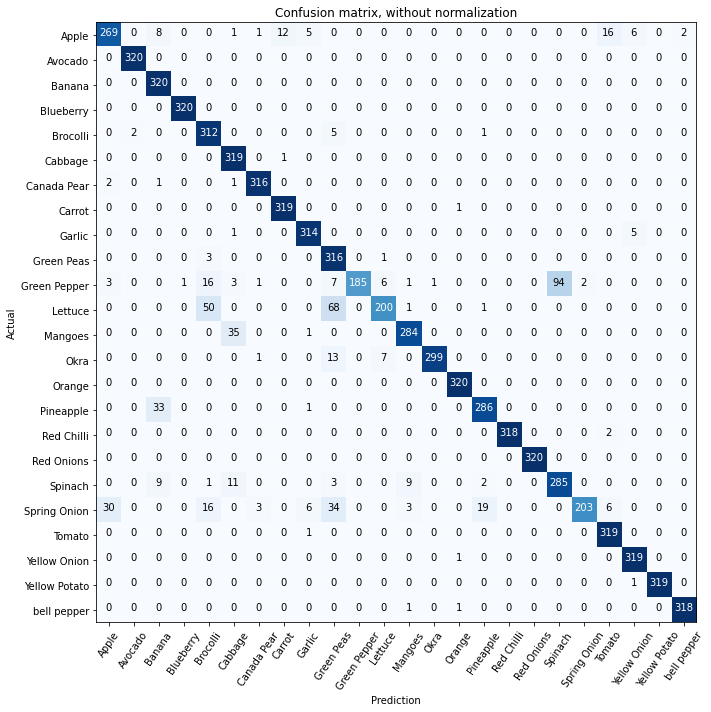

In [47]:

from sklearn.metrics import classification_report, confusion_matrix
import itertools

cm=confusion_matrix(test_generator.classes, predicted_classes)
classes=class_labels
np.set_printoptions(precision=2)
plt.figure(figsize=(15,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix, without normalization')
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=55)
plt.yticks(tick_marks, classes)
normalize=False
fmt ='d'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.tight_layout()